In [1]:
import numpy as np
from EMRM1D import EMRM_simulator
import matplotlib.pyplot as plt


# 1). Create simulator object

In [2]:
testModel = EMRM_simulator()

# 2). Set the layered model parameters

In [3]:
# Layer thicknesses
thicknesses = np.array([1.5,1.5,25,5,50,150])

# dielectric constant values
eps = np.array([3.15,4.3,3.15,4.3,3.15,4.0,8.5])

# Loss tangent or conductivity values
lossOrCond = np.array([0.002, 0.02, 0.002, 0.02, 0.002, 0.02,0.02])

# 1 if using conductivity, 0 if using loss tangent
useConductivity = 0

# Spacecraft altitude in meters
H = 300*1000


testModel.setModel(H,thicknesses,eps,lossOrCond,useConductivity)

# 3). Set the radar pulse

In [4]:
# Load pulse from csv file. 
timeTest, pulseTest = testModel.loadPulse('Sharad_Ideal_sourcePulse.csv')

# Set pulse
testModel.setPulse(pulseTest,timeTest)

# 4). Set the radar matched filter

In [5]:
tmfTest,fmfTest,mfTest = testModel.loadMatchFilter('Sharad_Ideal_matchedFilter.csv')

testModel.setMatchFilter(mfTest,fmfTest,tmfTest)

# 5). Set the windowing parameters

In [6]:
fmin = 15e6 #
fmax = 25e6 #
fnum = 6 # Use zero for no windowing, 6 is a Hann window

testModel.setWindowParam(fnum,fmin,fmax)

# 6). Run simulation and plot result

/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


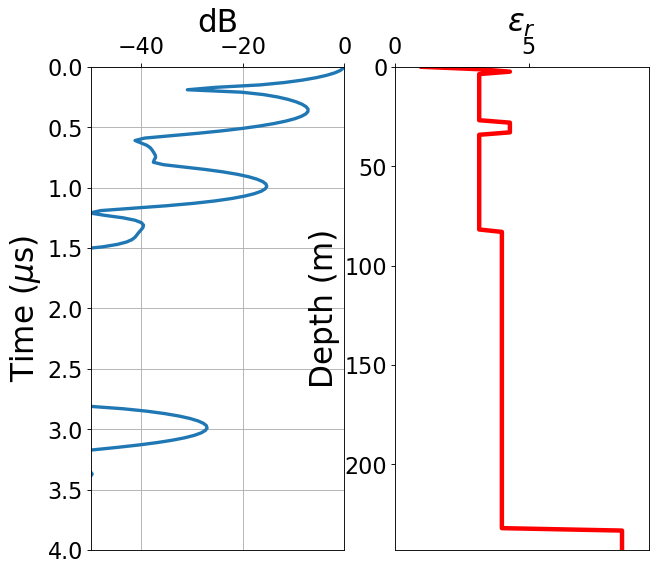

array([[-4.25000000e-05+0.00000000e+00j, -6.23384943e+01+2.59821115e+01j,
        -4.51876496e-09+3.32401277e-09j],
       [-4.24799953e-05+0.00000000e+00j, -6.31467121e+01-5.44049254e+00j,
         2.27143711e-09-4.57878622e-09j],
       [-4.24599906e-05+0.00000000e+00j, -6.46633855e+01+1.72094304e+01j,
         3.14852507e-10+4.28075655e-09j],
       ...,
       [ 4.24599906e-05+0.00000000e+00j, -6.38241199e+01+1.09681440e+01j,
         3.36493846e-09+3.32097819e-09j],
       [ 4.24799953e-05+0.00000000e+00j, -6.26693894e+01-2.06365700e+01j,
        -5.18699923e-09-1.50159441e-09j],
       [ 4.25000000e-05+0.00000000e+00j, -6.21856651e+01+2.64744314e+00j,
         5.61788121e-09-1.01725131e-09j]])

In [7]:
testModel.plotResult=True
testModel.plotTime=4 # in micro-seconds, this controls the time axis of the model plot
plt.rcParams.update({'font.size': 20}) # This changes the fint size of the tick labels
testModel.runSim()